In [1]:
# fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
class StepFunction(tf.keras.layers.Layer):
    def __init__(self):
        super(StepFunction, self).__init__()

    def call(self, inputs):
        return tf.round(tf.nn.sigmoid(inputs))

In [4]:
data = tf.convert_to_tensor([3.0, -2.0, 1.0], dtype=tf.float32)
layer = StepFunction()
output = layer(data)
print(output)

tf.Tensor([1. 0. 1.], shape=(3,), dtype=float32)


In [6]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128))
model.add(StepFunction())
model.add(keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 step_function_2 (StepFuncti  (None, 128)              0         
 on)                                                             
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# optimizer and loss
opt = tf.keras.optimizers.SGD(0.001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
batch_size = 256
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=2)

Epoch 1/100
235/235 - 1s - loss: 2.6033 - sparse_categorical_accuracy: 0.0749 - val_loss: 2.4735 - val_sparse_categorical_accuracy: 0.0928 - 896ms/epoch - 4ms/step
Epoch 2/100
235/235 - 1s - loss: 2.3967 - sparse_categorical_accuracy: 0.1168 - val_loss: 2.3354 - val_sparse_categorical_accuracy: 0.1297 - 555ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 2.2783 - sparse_categorical_accuracy: 0.1569 - val_loss: 2.2307 - val_sparse_categorical_accuracy: 0.1693 - 542ms/epoch - 2ms/step
Epoch 4/100
235/235 - 1s - loss: 2.1799 - sparse_categorical_accuracy: 0.1938 - val_loss: 2.1382 - val_sparse_categorical_accuracy: 0.2075 - 536ms/epoch - 2ms/step
Epoch 5/100
235/235 - 1s - loss: 2.0916 - sparse_categorical_accuracy: 0.2321 - val_loss: 2.0546 - val_sparse_categorical_accuracy: 0.2475 - 534ms/epoch - 2ms/step
Epoch 6/100
235/235 - 1s - loss: 2.0115 - sparse_categorical_accuracy: 0.2717 - val_loss: 1.9786 - val_sparse_categorical_accuracy: 0.2868 - 535ms/epoch - 2ms/step
Epoch 7/100
235/

Epoch 49/100
235/235 - 1s - loss: 1.0126 - sparse_categorical_accuracy: 0.6911 - val_loss: 1.0268 - val_sparse_categorical_accuracy: 0.6818 - 536ms/epoch - 2ms/step
Epoch 50/100
235/235 - 1s - loss: 1.0061 - sparse_categorical_accuracy: 0.6923 - val_loss: 1.0205 - val_sparse_categorical_accuracy: 0.6823 - 543ms/epoch - 2ms/step
Epoch 51/100
235/235 - 1s - loss: 0.9997 - sparse_categorical_accuracy: 0.6944 - val_loss: 1.0145 - val_sparse_categorical_accuracy: 0.6844 - 582ms/epoch - 2ms/step
Epoch 52/100
235/235 - 1s - loss: 0.9936 - sparse_categorical_accuracy: 0.6954 - val_loss: 1.0086 - val_sparse_categorical_accuracy: 0.6865 - 551ms/epoch - 2ms/step
Epoch 53/100
235/235 - 1s - loss: 0.9877 - sparse_categorical_accuracy: 0.6964 - val_loss: 1.0030 - val_sparse_categorical_accuracy: 0.6873 - 601ms/epoch - 3ms/step
Epoch 54/100
235/235 - 1s - loss: 0.9820 - sparse_categorical_accuracy: 0.6979 - val_loss: 0.9975 - val_sparse_categorical_accuracy: 0.6891 - 567ms/epoch - 2ms/step
Epoch 55/1

Epoch 99/100
235/235 - 1s - loss: 0.8329 - sparse_categorical_accuracy: 0.7319 - val_loss: 0.8539 - val_sparse_categorical_accuracy: 0.7234 - 582ms/epoch - 2ms/step
Epoch 100/100
235/235 - 1s - loss: 0.8309 - sparse_categorical_accuracy: 0.7321 - val_loss: 0.8520 - val_sparse_categorical_accuracy: 0.7237 - 632ms/epoch - 3ms/step


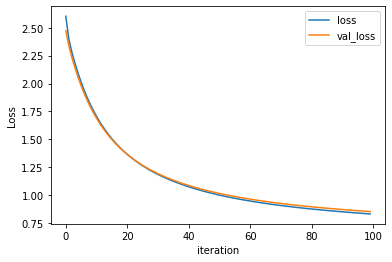

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

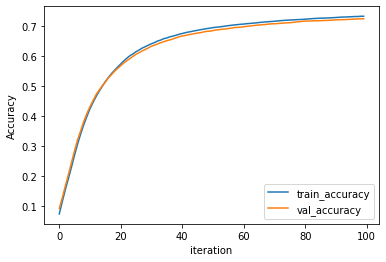

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
model.evaluate(X_test, y_test, batch_size)

40/40 [==============================] - 0s 2ms/step - loss: 0.8520 - sparse_categorical_accuracy: 0.7237


[0.8519867062568665, 0.7236999869346619]